1. All libraries
2. Import dataset
3. Clean dataset
4. Cosine similarity

# All libraries

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from spacy.lemmatizer import Lemmatizer
import spacy
nlp = spacy.load('en')
from sklearn.metrics.pairwise import cosine_similarity
from spacy import cli

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Import dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd 
df=pd.read_csv('/content/drive/Shareddrives/BA820 Team1/Raw data/anime_with_synopsis.csv')
data = df

In [ ]:
df.shape

(16214, 5)

In [ ]:
df.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'sypnopsis'], dtype='object')

# Clean dataset

Take out the 6k animes with the highest rating in all 16215 animes in anime_with_synopsis.csv

In [ ]:
df = df[df['Score'] != 'Unknown']
df = df.sort_values(by='Score', ascending=False)
df = df.iloc[:6000]

In [ ]:
pd.set_option('max_colwidt', None)
df['new_id']= np.arange(1, 6001)
df

,MAL_ID,Name,Score,Genres,sypnopsis,new_id
3446,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Magic, Fantasy, Shounen","""In order for something to be obtained, something of equal value must be lost."" Alchemy is bound by this Law of Equivalent Exchange—something the young brothers Edward and Alphonse Elric only realize after attempting human transmutation: the one forbidden act of alchemy. They pay a terrible price for their transgression—Edward loses his left leg, Alphonse his physical body. It is only by the desperate sacrifice of Edward's right arm that he is able to affix Alphonse's soul to a suit of armor. Devastated and alone, it is the hope that they would both eventually return to their original bodies that gives Edward the inspiration to obtain metal limbs called ""automail"" and become a state alchemist, the Fullmetal Alchemist. Three years of searching later, the brothers seek the Philosopher's Stone, a mythical relic that allows an alchemist to overcome the Law of Equivalent Exchange. Even with military allies Colonel Roy Mustang, Lieutenant Riza Hawkeye, and Lieutenant Colonel Maes Hughes on their side, the brothers find themselves caught up in a nationwide conspiracy that leads them not only to the true nature of the elusive Philosopher's Stone, but their country's murky history as well. In between finding a serial killer and racing against time, Edward and Alphonse must ask themselves if what they are doing will make them human again... or take away their humanity.",1
14647,40028,Shingeki no Kyojin: The Final Season,9.17,"Action, Military, Mystery, Super Power, Drama, Fantasy, Shounen","Gabi Braun and Falco Grice have been training their entire lives to inherit one of the seven titans under Marley's control and aid their nation in eradicating the Eldians on Paradis. However, just as all seems well for the two cadets, their peace is suddenly shaken by the arrival of Eren Yeager and the remaining members of the Survey Corps. Having finally reached the Yeager family basement and learned about the dark history surrounding the titans, the Survey Corps has at long last found the answer they so desperately fought to uncover. With the truth now in their hands, the group set out for the world beyond the walls. In Shingeki no Kyojin: The Final Season , two utterly different worlds collide as each party pursues its own agenda in the long-awaited conclusion to Paradis' fight for freedom.",2
4953,9253,Steins;Gate,9.11,"Thriller, Sci-Fi","The self-proclaimed mad scientist Rintarou Okabe rents out a room in a rickety old building in Akihabara, where he indulges himself in his hobby of inventing prospective ""future gadgets"" with fellow lab members: Mayuri Shiina, his air-headed childhood friend, and Hashida Itaru, a perverted hacker nicknamed ""Daru."" The three pass the time by tinkering with their most promising contraption yet, a machine dubbed the ""Phone Microwave,"" which performs the strange function of morphing bananas into piles of green gel. Though miraculous in itself, the phenomenon doesn't provide anything concrete in Okabe's search for a scientific breakthrough; that is, until the lab members are spurred into action by a string of mysterious happenings before stumbling upon an unexpected success—the Phone Microwave can send emails to the past, altering the flow of history. Adapted from the critically acclaimed visual novel by 5pb. and Nitroplus, Steins;Gate takes Okabe through the depths of scientific theory and practicality. Forced across the diverging threads of past and present, Okabe must shoulder the burdens that come with holding the key to the realm of time.",3
13720,38524,Shingeki no Kyojin Season 3 Part 2,9.1,"Action, Drama, Fantasy, Military, Mystery, Shounen, Super Power","Seeking to restore humanity's diminishing hope, the Survey Corps embark on a mission to retake Wall Maria, where the battle against the merciless ""Titans"" takes the stage once again. Retu

In [ ]:
df.shape

(6000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 3446 to 11323
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MAL_ID     6000 non-null   int64 
 1   Name       6000 non-null   object
 2   Score      6000 non-null   object
 3   Genres     6000 non-null   object
 4   sypnopsis  6000 non-null   object
 5   new_id     6000 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 328.1+ KB


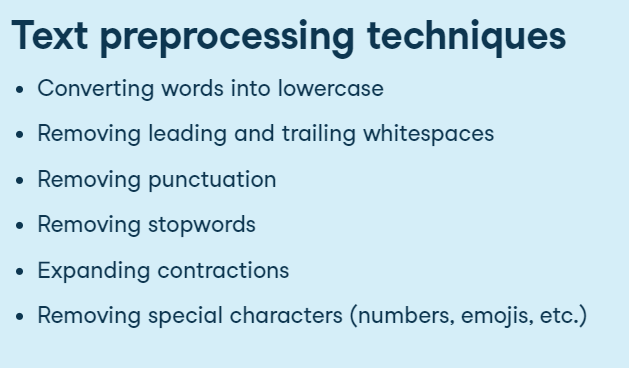

In [ ]:
# Convert words into lowercase
df['sypnopsis'] = df['sypnopsis'].str.lower()

In [ ]:
model = "en_core_web_md"
cli.download(model)

nlp = spacy.load(model)

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
# # Remove all words that are not alphabet (including japanese words and punctuations)
pd.set_option('max_colwidt', None)
df['sypnopsis'] = df['sypnopsis'].str.replace('—', ' ')
df['sypnopsis'] = df['sypnopsis'].str.replace('[^a-zA-Z\ ]', '')

In [ ]:
# Remove all English stopwords
STOPWORDS = list(stopwords.words('english'))
# We will add this to the countvectorizer param later

In [ ]:
# Lemmatization
nlp = spacy.load('en')

df['sypnopsis'] = df['sypnopsis'].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))
df['sypnopsis'] = df['sypnopsis'].str.replace('-PRON-', '')

In [ ]:
#fit transform from text column to make dtm

cv = CountVectorizer(stop_words=STOPWORDS)
dtm = cv.fit_transform(df['sypnopsis'])
cv.vocabulary_
dtm.toarray()[:5, :5]

dtm_df = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names())
dtm_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,aachi,aarinfantasy,aaron,aasu,aback,abandon,abandoned,abarai,abarenbou,abash,abbott,abbreviate,abduct,abducted,abduction,abductor,abducts,abdul,abdullah,abe,abel,abema,abematv,abeno,abenobashi,abenos,aberrant,aberration,abh,abhor,abide,abigail,abilitie,ability,abillity,abiru,ablaze,able,...,zoo,zoom,zor,zora,zorbados,zordar,zorndyke,zorndykes,zoro,zoroark,zorocia,zorori,zorro,zorua,zoruas,zouroku,zre,zs,zu,zuberg,zubu,zuellni,zuerst,zufu,zuho,zuisouroku,zukan,zuki,zum,zun,zundar,zuo,zuru,zusa,zutto,zuuma,zvezda,zwei,zygarde,zz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
len(cv.vocabulary_)

28720

# Cosine similarity




In [ ]:
cs = cosine_similarity(dtm)
# Let's try seeing it out
cs

array([[1.        , 0.0369914 , 0.04850534, ..., 0.09598157, 0.01531589,
        0.02092549],
       [0.0369914 , 1.        , 0.02731792, ..., 0.14414999, 0.        ,
        0.06285394],
       [0.04850534, 0.02731792, 1.        , ..., 0.04922347, 0.01885115,
        0.01287779],
       ...,
       [0.09598157, 0.14414999, 0.04922347, ..., 1.        , 0.02486824,
        0.13590592],
       [0.01531589, 0.        , 0.01885115, ..., 0.02486824, 1.        ,
        0.        ],
       [0.02092549, 0.06285394, 0.01287779, ..., 0.13590592, 0.        ,
        1.        ]])

In [ ]:
# Get the title of the anime that user likes
title = 'Fullmetal Alchemist: Brotherhood'

# Find the title id
anime_id = df[df['Name'] == title]['new_id'].values[0]
print(anime_id)



1


# Recommendation

In [ ]:
def recommend(anime):
    anime_id = df[df['Name'] == anime]['new_id'].values[0]
    distances = sorted(list(enumerate(cs[anime_id])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
      print(df[df['new_id'] == i[0]]['Name'].values[0])
    

recommend('Shingeki no Kyojin')

Tamayura: Sotsugyou Shashin Part 3 - Akogare
Lupin III: Sweet Lost Night - Mahou no Lamp wa Akumu no Yokan
Taiho Shichau zo (TV)
Mobile Suit Gundam Wing: Endless Waltz
Kuroko no Basket Movie 4: Last Game
